<a href="https://colab.research.google.com/github/taniyasinghsisodia/Deep-Learning-Projects/blob/master/toxic_comment_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-IN,en-GB;q=0.9,en-US;q=0.8,en;q=0.7,hi;q=0.6" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/8076/44219/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1596255382&Signature=OyqPTpWiRMkeil%2BeeBU%2B7gYhx5vabsHgTt4TV51AUzTIR7WXwrtD3pySbiHlbqZ30rtHQWyHwMzTy%2B7ih71umAM2eCDCAjkHX8TmxaHiV3X14u6gkqLlzDDIfMQOc8XOK3mQ2C6PgsdElyp0KZ0gEAp8wNDM%2BydoIygSBJ3CE2yDXZLLk%2FF0Q7BOee8CbFvjL06sR9rgIFtG8l%2BrQk1f8ndguxAuDfSODLnqVcTciD74Yw7rYbT1jJrBFAFl%2FuZfFevLSYlGqxvdbDvzlk1XQ3iy6l8KHv289geE8bQM26PT2Q2fF39yuWMugge4%2FL9E7kJtSgkPehlnm0azNX5msQ%3D%3D&response-content-disposition=attachment%3B+filename%3Djigsaw-toxic-comment-classification-challenge.zip" -c -O 'jigsaw-toxic-comment-classification-challenge.zip'

--2020-07-29 04:16:39--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/8076/44219/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1596255382&Signature=OyqPTpWiRMkeil%2BeeBU%2B7gYhx5vabsHgTt4TV51AUzTIR7WXwrtD3pySbiHlbqZ30rtHQWyHwMzTy%2B7ih71umAM2eCDCAjkHX8TmxaHiV3X14u6gkqLlzDDIfMQOc8XOK3mQ2C6PgsdElyp0KZ0gEAp8wNDM%2BydoIygSBJ3CE2yDXZLLk%2FF0Q7BOee8CbFvjL06sR9rgIFtG8l%2BrQk1f8ndguxAuDfSODLnqVcTciD74Yw7rYbT1jJrBFAFl%2FuZfFevLSYlGqxvdbDvzlk1XQ3iy6l8KHv289geE8bQM26PT2Q2fF39yuWMugge4%2FL9E7kJtSgkPehlnm0azNX5msQ%3D%3D&response-content-disposition=attachment%3B+filename%3Djigsaw-toxic-comment-classification-challenge.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55201987 (53M) [application/zip]
Saving to: ‘jigsaw-toxic

In [ ]:
!unzip jigsaw-toxic-comment-classification-challenge.zip

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: sample_submission.csv.zip  
  inflating: test.csv.zip            
  inflating: test_labels.csv.zip     
  inflating: train.csv.zip           


In [ ]:
! wget https://nlp.stanford.edu/data/glove.6B.zip

--2020-07-29 04:17:58--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-07-29 04:17:58--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  2.07MB/s    in 6m 26s  

2020-07-29 04:24:24 (2.13 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("glove.6B.zip", 'r')
zip_ref.extractall("glove")
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import roc_auc_score

In [ ]:
MAX_SEQUENCE_LENGTH = 100
MAX_VOCAB_SIZE = 20000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 10

In [ ]:
word2vec = {}
with open("glove/glove.6B.100d.txt") as f:
  
  for line in f:
    
    values = line.split()
    word = values[0]
    
    vec = np.asarray(values[1:],dtype="float32")
    word2vec[word] = vec
    
print("Found %s word vectors." % len(word2vec))

Found 400000 word vectors.


In [ ]:
train = pd.read_csv("train.csv")
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
sentences = train["comment_text"].fillna("DUMMY_VALUES").values
sentences

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [ ]:
sentences.shape

(159571,)

In [ ]:
possible_labels = ["toxic","severe_toxic","obscene","threat","insult","identity_hate"]

In [ ]:
targets = train[possible_labels].values

In [ ]:
print("max sequence length:", max(len(s) for s in sentences))
print("min sequence length:", min(len(s) for s in sentences))

max sequence length: 5000
min sequence length: 6


In [ ]:
s = sorted(len(s) for s in sentences)

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = MAX_VOCAB_SIZE)

In [ ]:
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
# get word -> integer mapping
word2idx = tokenizer.word_index

In [ ]:
len(word2idx)

210337

In [ ]:
# pad sequences so that we get N x T matrix

data = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
data.shape

(159571, 100)

In [ ]:
data

array([[    0,     0,     0, ...,  4583,  2273,   985],
       [    0,     0,     0, ...,   589,  8377,   182],
       [    0,     0,     0, ...,     1,   737,   468],
       ...,
       [    0,     0,     0, ...,  3509, 13675,  4528],
       [    0,     0,     0, ...,   151,    34,    11],
       [    0,     0,     0, ...,  1627,  2056,    88]], dtype=int32)

In [ ]:
# prepare our embedding matrix

num_words = min(MAX_VOCAB_SIZE,len(word2idx)+1)
num_words

20000

In [ ]:
embedding_matrix = np.zeros((num_words,EMBEDDING_DIM))

In [ ]:
for word, i in word2idx.items():
  
  if i < MAX_VOCAB_SIZE:
    
    
    embedding_vector = word2vec.get(word)
    if embedding_vector is not None:
      
      embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.18970001,  0.050024  ,  0.19084001, ..., -0.39804   ,
         0.47646999, -0.15983   ],
       ...,
       [-1.04809999, -0.32789999, -0.46593001, ..., -0.065447  ,
        -0.13019   ,  0.44433001],
       [ 0.089782  , -0.33164999, -0.85716999, ..., -0.15765999,
        -0.58174002,  0.036233  ],
       [ 0.051446  , -0.43564001,  0.26989001, ...,  0.39087   ,
        -0.14459001, -0.72372001]])

In [ ]:
embedding_matrix.shape

(20000, 100)

In [ ]:
embedding_layer = tf.keras.layers.Embedding(num_words,EMBEDDING_DIM,
                           weights = [embedding_matrix],
                           input_length = MAX_SEQUENCE_LENGTH,
                           trainable=False)

In [ ]:
input_ = tf.keras.layers.Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedding_layer(input_)
x = tf.keras.layers.Conv1D(128,3,activation="relu")(x)
x = tf.keras.layers.MaxPooling1D(3)(x)
x = tf.keras.layers.Conv1D(128,3,activation="relu")(x)
x = tf.keras.layers.MaxPooling1D(3)(x)
x = tf.keras.layers.Conv1D(128,3,activation="relu")(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
x = tf.keras.layers.Dense(128,activation="relu")(x)

output = tf.keras.layers.Dense(len(possible_labels),activation="sigmoid")(x)

model = tf.keras.models.Model(input_,output)

model.compile(loss="binary_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

r = model.fit(data,targets,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_split=VALIDATION_SPLIT)

Epoch 1/10
998/998 [==============================] - 7s 7ms/step - loss: 0.0875 - accuracy: 0.9777 - val_loss: 0.0704 - val_accuracy: 0.9941
Epoch 2/10
998/998 [==============================] - 7s 7ms/step - loss: 0.0681 - accuracy: 0.9891 - val_loss: 0.0680 - val_accuracy: 0.8843
Epoch 3/10
998/998 [==============================] - 7s 7ms/step - loss: 0.0635 - accuracy: 0.9903 - val_loss: 0.0735 - val_accuracy: 0.9940
Epoch 4/10
998/998 [==============================] - 7s 7ms/step - loss: 0.0603 - accuracy: 0.9931 - val_loss: 0.0749 - val_accuracy: 0.9941
Epoch 5/10
998/998 [==============================] - 7s 7ms/step - loss: 0.0578 - accuracy: 0.9919 - val_loss: 0.0706 - val_accuracy: 0.9824
Epoch 6/10
998/998 [==============================] - 7s 7ms/step - loss: 0.0555 - accuracy: 0.9930 - val_loss: 0.0730 - val_accuracy: 0.9941
Epoch 7/10
998/998 [==============================] - 7s 7ms/step - loss: 0.0531 - accuracy: 0.9928 - val_loss: 0.0745 - val_accuracy: 0.9941
Epoch 

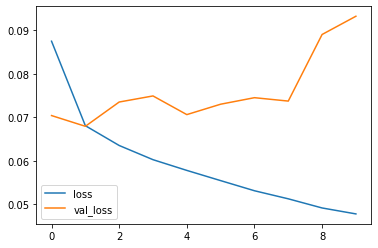

In [ ]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [ ]:
r.history

{'accuracy': [0.9776900410652161,
  0.9891035556793213,
  0.9902785420417786,
  0.9931378364562988,
  0.9918844103813171,
  0.9929733276367188,
  0.9927774667739868,
  0.993106484413147,
  0.9927931427955627,
  0.992863655090332],
 'loss': [0.0875086709856987,
  0.06809491664171219,
  0.06354719400405884,
  0.06028524041175842,
  0.05782127007842064,
  0.05547407642006874,
  0.053145553916692734,
  0.051290709525346756,
  0.04919032007455826,
  0.047821030020713806],
 'val_accuracy': [0.9941093325614929,
  0.884255051612854,
  0.9940153360366821,
  0.9941093325614929,
  0.9824220538139343,
  0.9941406846046448,
  0.9940780401229858,
  0.9935140013694763,
  0.9929186701774597,
  0.9937959909439087],
 'val_loss': [0.07042467594146729,
  0.06795642524957657,
  0.07353581488132477,
  0.07493393123149872,
  0.0706443190574646,
  0.07303274422883987,
  0.07453253120183945,
  0.07375156879425049,
  0.08905717730522156,
  0.0932498648762703]}

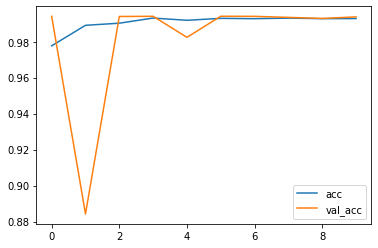

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
p = model.predict(data)

In [ ]:
aucs = []
for j in range(6):
  
  auc = roc_auc_score(targets[:,j],p[:,j])
  aucs.append(auc)
  
print(np.mean(aucs))

0.9758342158831982
